In [112]:
!pip install scipy

In [113]:
!pip install statsmodels

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')


# EDA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [79]:
data= pd.read_csv("Datasets/traffic.csv")
data.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Junction,48120.0,2.180549e+00,9.669554e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Vehicles,48120.0,2.279133e+01,2.075006e+01,1.000000e+00,9.000000e+00,1.500000e+01,2.900000e+01,1.800000e+02
ID,48120.0,2.016330e+10,5.944854e+06,2.015110e+10,2.016042e+10,2.016093e+10,2.017023e+10,2.017063e+10


In [17]:
data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [18]:
data.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

There are not any null and na values present in dataset. So It indicates that dataset is clean.
We will delete the duplicates ID if present.

In [20]:
# Droppimg duplicates 
data.drop_duplicates()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [21]:
# Converting Datetime column to datetime tyoe to access date , monthd and days from the Dates in the column
data['DateTime']= pd.to_datetime(data['DateTime'])


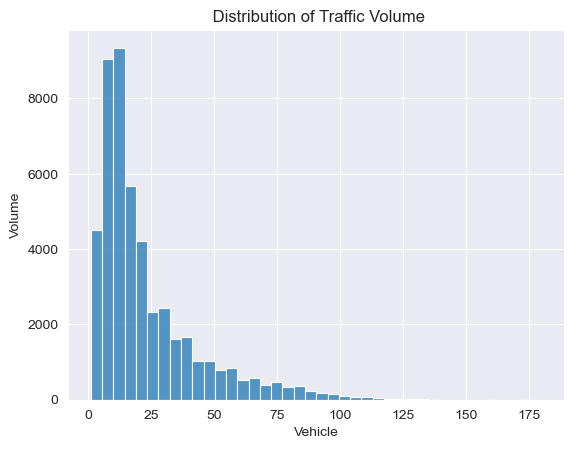

In [25]:
sns.set_style('darkgrid')
sns.histplot(data, x='Vehicles',kde=False, bins= 40)
plt.plot()
plt.title(" Distribution of Traffic Volume")
plt.xlabel("Vehicle")
plt.ylabel("Volume")
plt.show()

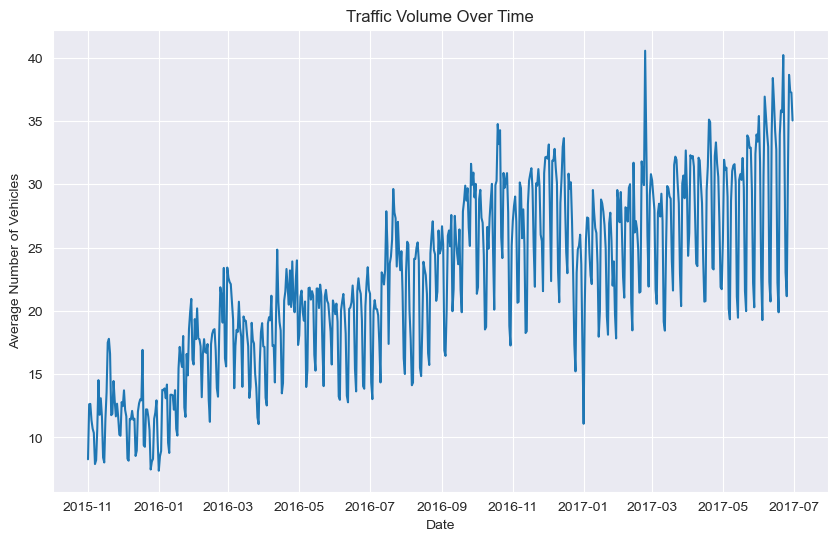

In [32]:
# Traffic Volume over time
plt.figure(figsize=(10,6))
traffic_data = data.set_index('DateTime').resample('D').mean()
sns.lineplot(data=traffic_data, x=traffic_data.index, y='Vehicles')

plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.show()

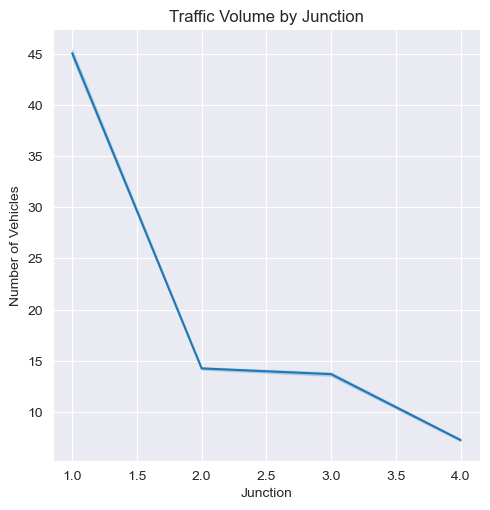

In [35]:
# Traffic Volume across different junctions

sns.relplot(data, x='Junction', y='Vehicles',kind='line')
plt.title('Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()

In [ ]:
The above graph indicaes that more traffic observed at the junction 1. 

In [61]:
# Creating new columns for hour of the day and day of the week

data['HourOfDay'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.day_name()


In [62]:
# Traffic Volume for each hour of the day
hourly_traffic = data.groupby('HourOfDay')['Vehicles'].mean().reset_index()
 
# mean traffic volume for each day of the week

weekly_traffic = data.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()


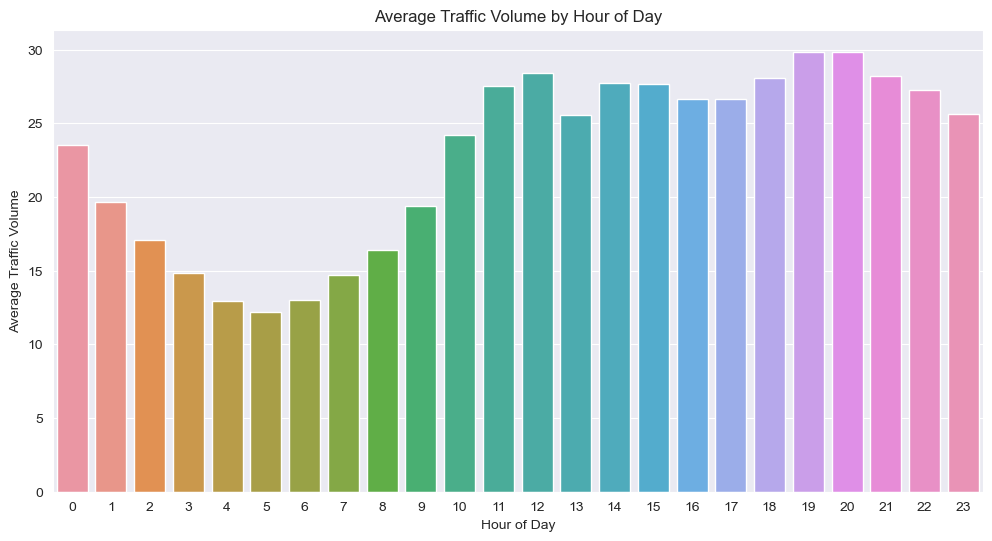

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_traffic,x='HourOfDay', y='Vehicles')
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.show()

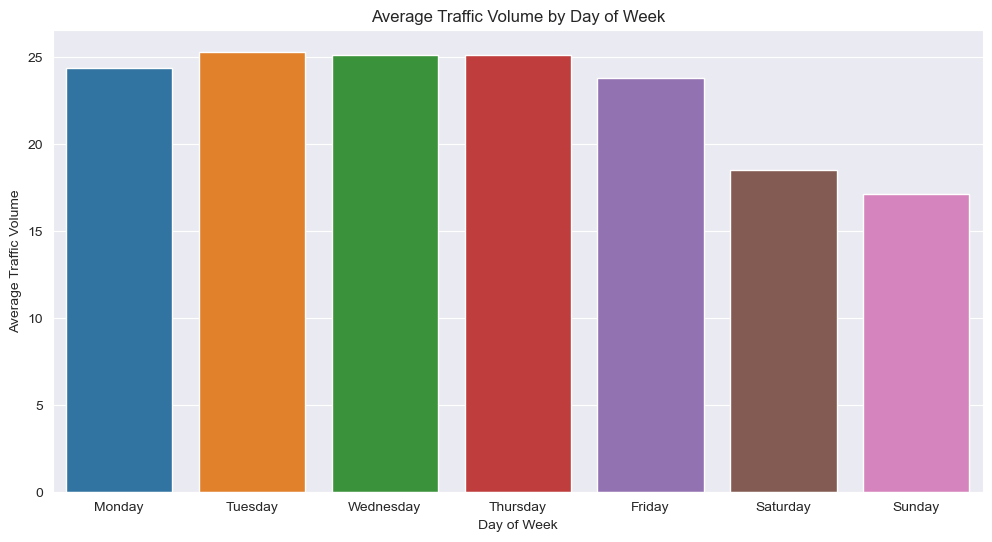

In [63]:
# mean traffic volume for each day of the week

weekly_traffic = data.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Vehicles', data=weekly_traffic)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.show()

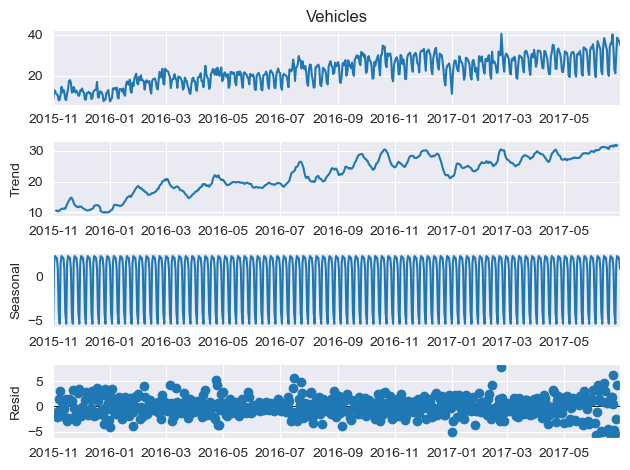

In [50]:
# Time Series Decomposition
# traffic_data_daily = data.set_index('DateTime').mean()
traffic_data_daily = data.set_index('DateTime').resample('D').mean()
decomposition = seasonal_decompose(traffic_data_daily['Vehicles'], model='additive')
decomposition.plot()
plt.show()


Observation: The plot shows fluctuations over time, which seem to repeat in a pattern, suggesting some seasonality in the data.

Trend: This component shows a smoothed version of the observed data, highlighting the long-term progression or changes in traffic volume. The trend line indicates that overall traffic volume may have some periods of increase or decrease. There are some fluctuations in the trend as well, which may correspond to underlying factors affecting traffic volume over a longer period.

Seasonal: The seasonal component captures the regular pattern within the data that repeats over a specific period. The pattern is very consistent, showing peaks and dips at regular intervals. This could correspond to higher traffic volumes on specific days of the week and lower on others, which might be associated with typical workweek patterns.

Residual: These are the irregularities or noise left after the trend and seasonal components have been removed from the observed data. The residuals appear to be randomly scattered around zero without any discernible pattern, which suggests that the model has captured the trend and seasonality well. However, there are a few outliers, indicating occasional deviations from the expected traffic volume that weren't explained by the trend or seasonal components.

Overall, the decomposition suggests that there is a strong seasonal pattern in the data, with some long-term trends and random noise. The insights from this analysis can help in forecasting traffic volumes, planning city infrastructure, and managing peak traffic times. 

# Correlation 

In [66]:
# Find colinearity 
correlation= data[['HourOfDay', 'DayOfWeek', 'Vehicles']].corr()
print(correlation)

           HourOfDay  Vehicles
HourOfDay   1.000000  0.219938
Vehicles    0.219938  1.000000


[]

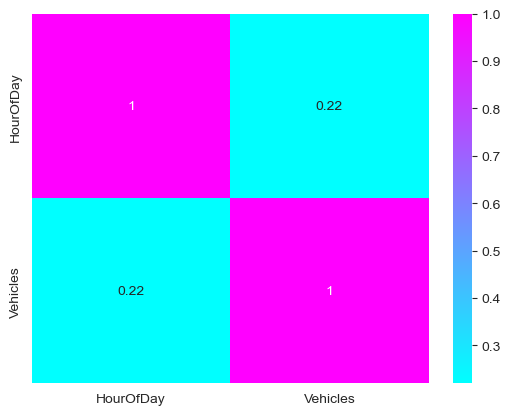

In [69]:
sns.heatmap(correlation,annot= True,cmap='cool')
plt.plot()

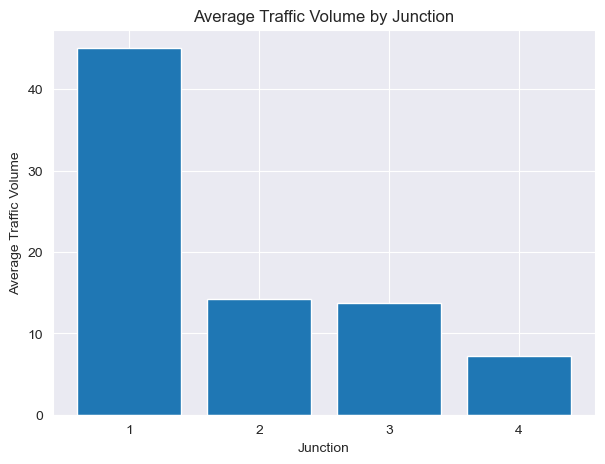

In [74]:
# Group the data by 'Junction' and calculate the average 'Vehicles'
junction_comparison = data.groupby('Junction')['Vehicles'].mean().reset_index()

# Plotting the average traffic volume by junction
plt.figure(figsize=(7, 5))
plt.bar(junction_comparison['Junction'], junction_comparison['Vehicles'])
plt.title('Average Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Average Traffic Volume')
plt.xticks(junction_comparison['Junction'])
plt.show()

In [71]:
avg_traffic_by_junction = data.groupby('Junction')['Vehicles'].mean()
avg_traffic_by_junction

Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64

# Outliers Detection

In [96]:

# Set the 'DateTime' column as the index
data = pd.read_csv('Datasets/traffic.csv')

data['DateTime'] = pd.to_datetime(data['DateTime'])

data =data.set_index('DateTime')

# Resample the data by day to get the total number of vehicles per day
data =data.resample('D').sum()



In [99]:
# Calculate the Z-scores for the daily traffic volume
data['Z-Score'] = zscore(data['Vehicles'])

# threshold for identify outliers
threshold = 2

# Identify outliers
outliers = data[(data['Z-Score'] > threshold) | (data['Z-Score'] < -threshold)]

print(outliers)

            Junction  Vehicles             ID   Z-Score
DateTime                                               
2017-02-23       240      3892  1936341419280  2.849179
2017-04-19       240      3370  1936360235280  2.136948
2017-04-20       240      3352  1936360331280  2.112388
2017-06-01       240      3397  1936377707280  2.173788
2017-06-06       240      3544  1936378187280  2.374358
2017-06-07       240      3411  1936378283280  2.192890
2017-06-08       240      3273  1936378379280  2.004598
2017-06-13       240      3685  1936378859280  2.566743
2017-06-14       240      3506  1936378955280  2.322510
2017-06-15       240      3284  1936379051280  2.019607
2017-06-20       240      3440  1936379531280  2.232458
2017-06-21       240      3426  1936379627280  2.213356
2017-06-22       240      3859  1936379723280  2.804153
2017-06-27       240      3709  1936380203280  2.599489
2017-06-28       240      3579  1936380299280  2.422113
2017-06-29       240      3575  1936380395280  2

In [101]:
outliers = data[(data['Z-Score'] > 3) | (data['Z-Score'] < -3)]
print(outliers)

Empty DataFrame
Columns: [Junction, Vehicles, ID, Z-Score]
Index: []


analysis of the given output:

The DateTime column represents the dates where higher traffic volumes were recorded.
The Vehicles column shows the total number of vehicles observed on those dates.
The Z-Score column indicates how many standard deviations away from the mean daily traffic volume these values are.
All the Z-Scores are above 2, which means these data points are more than two standard deviations higher than the average, but they do not exceed the threshold of 3 standard deviations that is typically used to define an outlier.
It there are not any outliers present which affects the analysis.


In [103]:
# Detecting outliers in 'Vehicles' column
Q1 = data['Vehicles'].quantile(0.25)
Q3 = data['Vehicles'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(traffic_data['Vehicles'] < (Q1 - 1.5 * IQR)) | (traffic_data['Vehicles'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Junction, Vehicles, ID, Z-Score]
Index: []


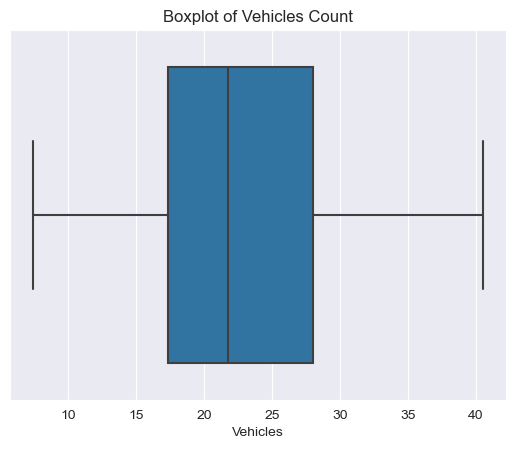

In [104]:
sns.boxplot(x=traffic_data['Vehicles'])
plt.title('Boxplot of Vehicles Count')
plt.show()


# ADF


In statistics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [105]:
def adf_check(timeseries):
    result = adfuller(timeseries,autolag ='AIC')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Apply the function on time series data
adf_check(data['Vehicles'])

ADF Statistic: -0.08941073381606288
p-value: 0.950483104357937
Critical Values:
	1%: -3.44152019959894
	5%: -2.8664679191981297
	10%: -2.569394451038919


Here P value we are getting is 0.95 which is greater than the significant threshold value 0.05. This means it indicates that null hypothesis cannot be rejected.
Here there is 95% chance to get result expected  result .

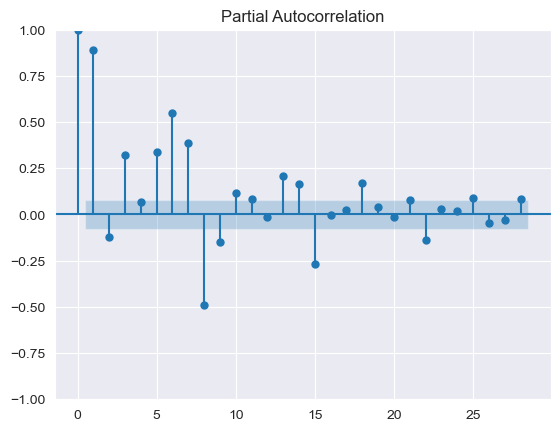

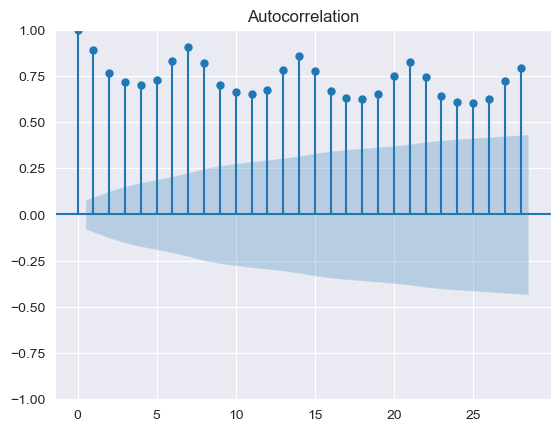

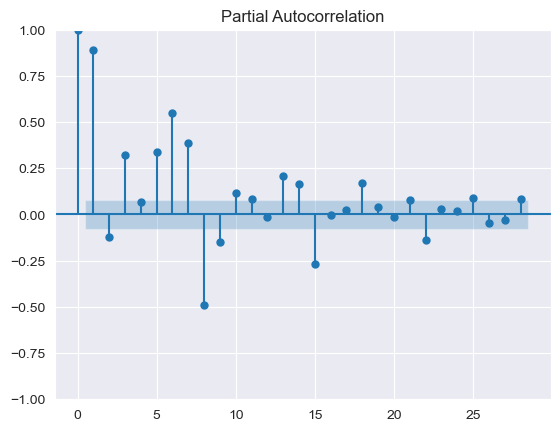

In [110]:
plot_acf(data['Vehicles'].dropna())
plot_pacf(data['Vehicles'].dropna())